Avery Anderson Assignment #3

Q2
Load the ./data/ForeignGifts_edu.csv dataset.

In [38]:
import numpy as np # Import the numpy package into your workspace
import matplotlib.pyplot as plt # Import matplotlib into your workspace
import seaborn as sns
import pandas as pd  # Import the pandas package into your workspace

In [4]:
df = pd.read_csv('/Users/averyanderson/Desktop/data/ForeignGifts_edu.csv',low_memory=False) #read in data

In [6]:
df.head(5)

,ID,OPEID,Institution Name,City,State,Foreign Gift Received Date,Foreign Gift Amount,Gift Type,Country of Giftor,Giftor Name
0,1,102000,Jacksonville State University,Jacksonville,AL,43738,250000,Monetary Gift,CHINA,NaN
1,2,104700,Troy University,Troy,AL,43592,463657,Contract,CHINA,Confucius Institute Headquarters
2,3,105100,University of Alabama,Tuscaloosa,AL,43466,3649107,Contract,ENGLAND,Springer Nature Customer Service Ce
3,4,105100,University of Alabama,Tuscaloosa,AL,43472,1000,Contract,SAUDI ARABIA,Saudi Arabia Education Mission
4,5,105100,University of Alabama,Tuscaloosa,AL,43479,49476,Contract,SAUDI ARABIA,Saudi Arabia Education Mission


In [26]:
df.describe()

,ID,OPEID,Foreign Gift Received Date,Foreign Gift Amount,gift_arcsinh,gift_log
count,28221.00000,2.822100e+04,28221.000000,2.822100e+04,28221.000000,28197.000000
mean,14111.00000,2.487055e+05,42875.689061,5.882327e+05,11.188063,10.512107
std,8146.84531,3.009704e+05,641.917904,3.222011e+06,3.272789,3.218101
min,1.00000,1.020000e+05,41640.000000,-5.377700e+05,-13.888333,0.000000
25%,7056.00000,1.315000e+05,42336.000000,5.700000e+03,9.341369,8.664406
50%,14111.00000,2.077000e+05,42934.000000,9.461500e+04,12.150718,11.462590
75%,21166.00000,2.974000e+05,43466.000000,3.761420e+05,13.530869,12.839342
max,28221.00000,4.279700e+06,44012.000000,1.000000e+08,19.113828,18.420681


For Foreign Gift Amount, create a histogram and describe the variable. Describe your findings.

<Axes: >

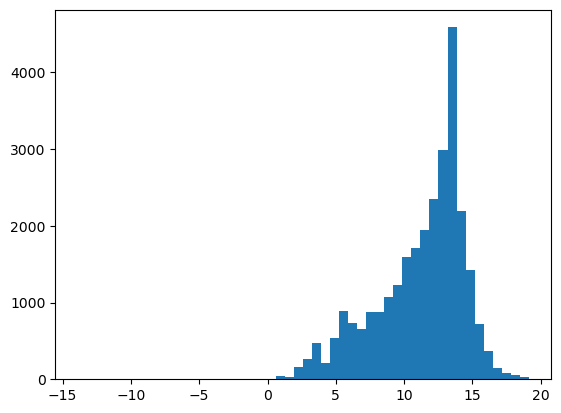

In [30]:
df['gift_arcsinh'] = np.arcsinh(df['Foreign Gift Amount'])
df['gift_arcsinh'].hist(bins=50,grid=False)

When I first tried this histogram, I ran into scaling issues which led me to take the arcsinh when creating the histogram above
This histogram indicates that a majority of the donations were between 10 and 15, though this is the log of the actual values. The actual amount would be much higher ranging anywhere from 20,000 to 3 million, a much larger range. 

For Gift Type, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

Axes(0.125,0.11;0.775x0.77) 

Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64


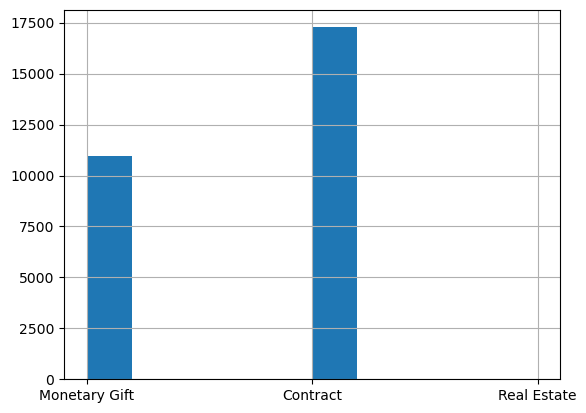

In [32]:
print(df['Gift Type'].hist(), '\n')
counts = df['Gift Type'].value_counts()
print(counts)

Out of 28,221 datapoints, about 61% are contracts, 38.7% are monetary gifts, and 0.0004% are real estate

Create a kernel density plot of the log of Foreign Gift Amount, and then a kernel density plot of the log of Foreign Gift Amount conditional on gift type. Do you notice any patterns?

/opt/anaconda3/lib/python3.12/site-packages/pandas/core/arraylike.py:399: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Axes: ylabel='Density'>

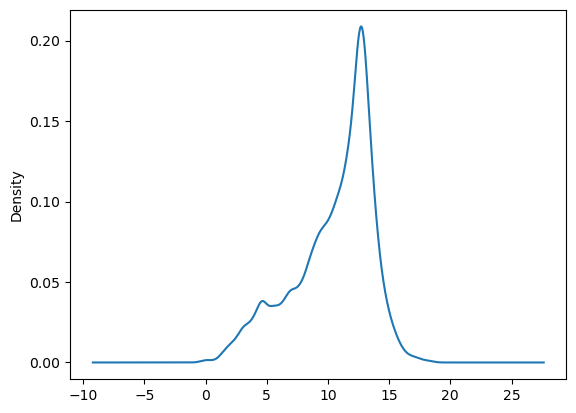

In [34]:
df['gift_log'] = np.log(df['Foreign Gift Amount'])
var = 'gift_log'
df[var].plot.density()

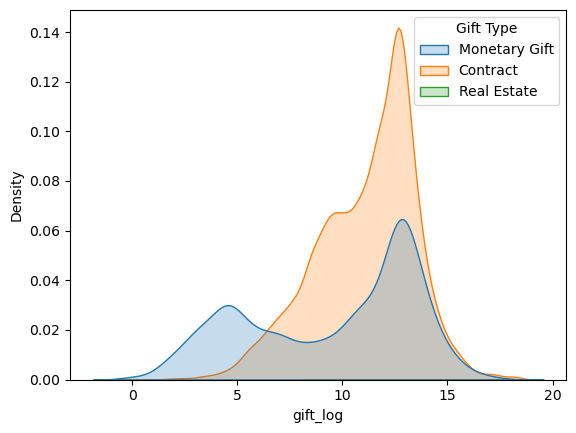

In [40]:
sns.kdeplot(data=df, x="gift_log", hue="Gift Type", fill=True)
plt.show()

Contracts get are more generous donations than monetary gifts by far. 

What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

In [44]:
top_number = df["Country of Giftor"].value_counts().head(15)
print(top_number)

Country of Giftor
ENGLAND            3655
CHINA              2461
CANADA             2344
JAPAN              1896
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1437
GERMANY            1394
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64


In [46]:
top_amount = df.groupby("Country of Giftor")["Foreign Gift Amount"].sum().nlargest(15)
print(top_amount)

Country of Giftor
QATAR                   2706240869
ENGLAND                 1464906771
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    655954776
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442475605
UNITED ARAB EMIRATES     431396357
FRANCE                   405839396
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions.

In [50]:
top_institutions = df.groupby("Institution Name")["Foreign Gift Amount"].sum().nlargest(15)
print(top_institutions)

Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


<Axes: xlabel='Foreign Gift Amount', ylabel='Count'>

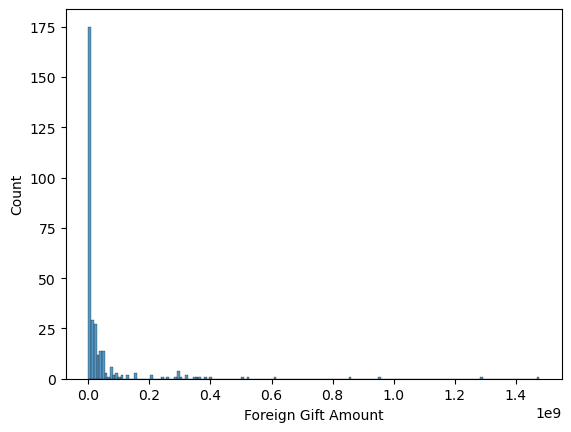

In [52]:
institution_total = df.groupby("Institution Name")["Foreign Gift Amount"].sum()
sns.histplot(institution_total)

Which giftors provide the most money, in total?

In [54]:
top_giftor = df.groupby("Giftor Name")["Foreign Gift Amount"].sum().nlargest(15)
print(top_giftor)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


Question 3:
Load the ./data/airbnb_hw.csv data with Pandas. This provides a dataset of AirBnB rental properties for New York City.

In [60]:
df = pd.read_csv('/Users/averyanderson/Desktop/data/airbnb_hw.csv',low_memory=False)

What are are the dimensions of the data? How many observations are there? What are the variables included? Use .head() to examine the first few rows of data.

In [72]:
df.head(5)

,Host Id,Host Since,Name,Neighbourhood,Property Type,Review Scores Rating (bin),Room Type,Zipcode,Beds,Number of Records,Number Of Reviews,Price,Review Scores Rating
0,5162530,NaN,1 Bedroom in Prime Williamsburg,Brooklyn,Apartment,NaN,Entire home/apt,11249.0,1.0,1,0,145,NaN
1,33134899,NaN,"Sunny, Private room in Bushwick",Brooklyn,Apartment,NaN,Private room,11206.0,1.0,1,1,37,NaN
2,39608626,NaN,Sunny Room in Harlem,Manhattan,Apartment,NaN,Private room,10032.0,1.0,1,1,28,NaN
3,500,6/26/2008,Gorgeous 1 BR with Private Balcony,Manhattan,Apartment,NaN,Entire home/apt,10024.0,3.0,1,0,199,NaN
4,500,6/26/2008,Trendy Times Square Loft,Manhattan,Apartment,95.0,Private room,10036.0,3.0,1,39,549,96.0


In [74]:
df.shape[0]

30478

this dataset has 30,478 observations and includes the variables: host id, how long they've been a host, name, neighborhood, property type, rating, room type, zipcode, beds, number of records, number of reviews, price and review scores rating

Cross tabulate Room Type and Property Type. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?

In [76]:
cross_tab = pd.crosstab(df['Room Type'], df['Property Type'])
print(cross_tab) 

Property Type    Apartment  Bed & Breakfast  Boat  Bungalow  Cabin  Camper/RV  \
Room Type                                                                       
Entire home/apt      15669               13     7         4      1          6   
Private room         10748              155     1         0      1          1   
Shared room            685               12     0         0      0          0   

Property Type    Castle  Chalet  Condominium  Dorm  House  Hut  Lighthouse  \
Room Type                                                                    
Entire home/apt       0       0           72     4    752    0           1   
Private room          1       1           22    16   1258    2           0   
Shared room           0       0            0    11     80    0           0   

Property Type    Loft  Other  Tent  Townhouse  Treehouse  Villa  
Room Type                                                        
Entire home/apt   392     14     0         83          0      4  
Priva

I am noticing that a majority of the property types are apartments. Entire home and private rooms appear to be the most frequent room types, especially for apartments and houses which are the most common property types. Understandably more obscure spaces are primarily the entire home/apt. Private rooms are more common in houses and dorms instead of entire home. 

For Price, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use log to transform price into a new variable, price_log, and take these steps again.

<Axes: >

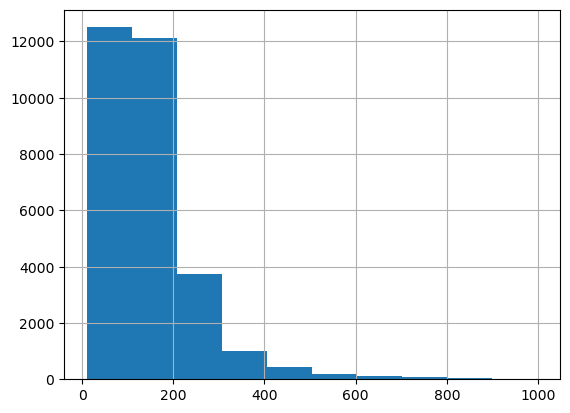

In [84]:
var = 'Price' # A numeric variable
df[var] = pd.to_numeric(df[var], errors='coerce') # Coerce the variable to numeric
df['price_nan'] = df[var].isnull()
df['Price'].hist()

<Axes: ylabel='Density'>

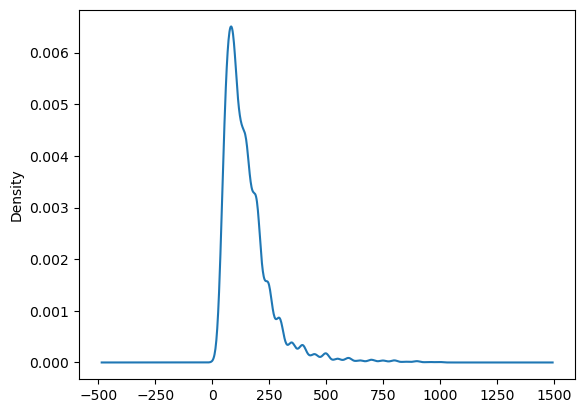

In [90]:
df['Price'].plot.density()

<Axes: >

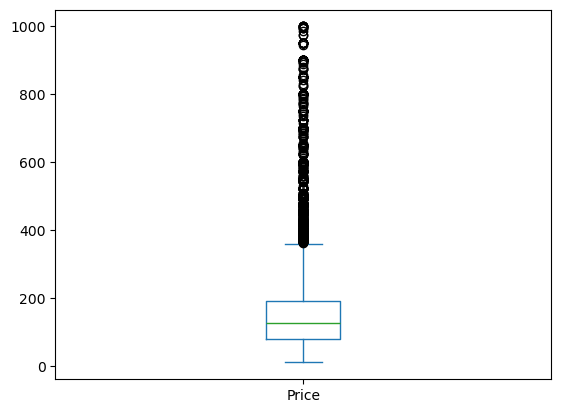

In [86]:
df['Price'].plot.box()

In [92]:
df['Price'].describe()

count    30297.000000
mean       153.357032
std        108.895698
min         10.000000
25%         80.000000
50%        125.000000
75%        192.000000
max        999.000000
Name: Price, dtype: float64

There appear to be quite a few outliers and these graphs are no scaled as well as they could be

<Axes: >

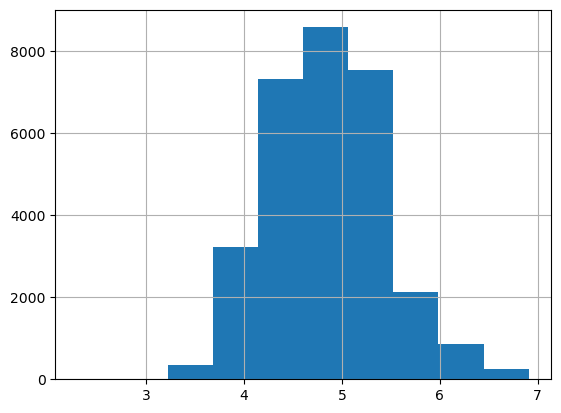

In [94]:
df['price_log'] = np.log(df['Price'])
df['price_log'].hist()

<Axes: ylabel='Density'>

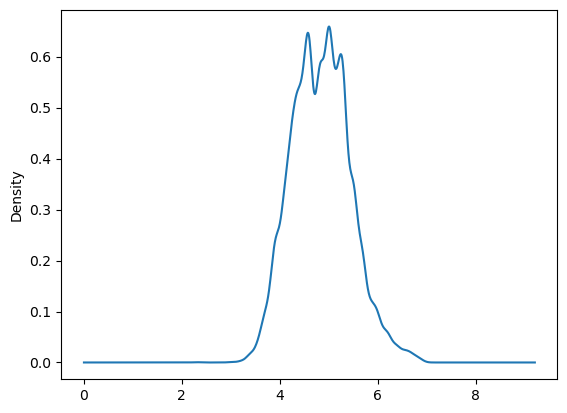

In [96]:
df['price_log'].plot.density()

<Axes: >

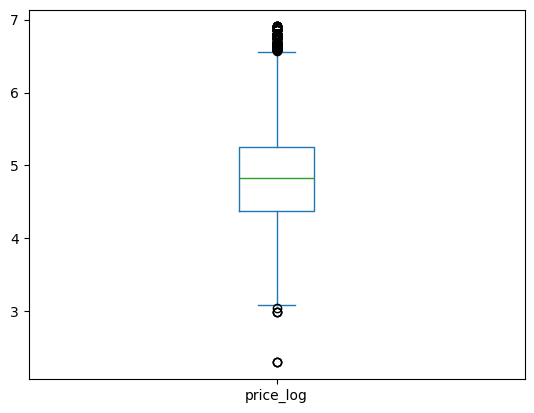

In [98]:
df['price_log'].plot.box()

In [100]:
df['price_log'].describe()

count    30297.000000
mean         4.845370
std          0.596999
min          2.302585
25%          4.382027
50%          4.828314
75%          5.257495
max          6.906755
Name: price_log, dtype: float64

Make a scatterplot of price_log and Beds. Describe what you see. Use .groupby() to compute a desciption of Price conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.

Text(0, 0.5, 'beds')

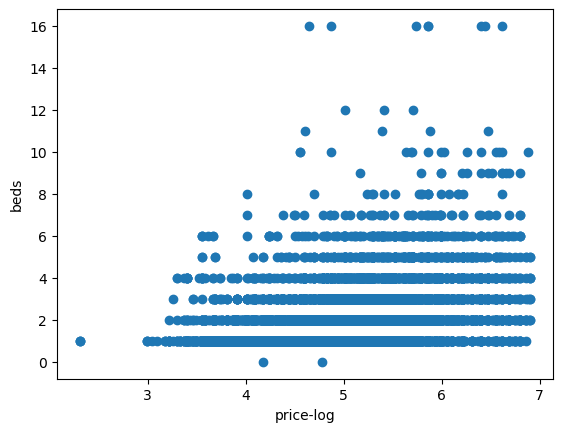

In [104]:
plt.scatter(df['price_log'], df['Beds'])
plt.xlabel("price-log")
plt.ylabel("beds")

In [114]:
var = 'Price'
group = 'Beds'
df.loc[:,[group,var]].groupby(group).describe()

Price                                                             
        count        mean         std    min     25%    50%     75%    max
Beds                                                                      
0.0       2.0   92.000000   38.183766   65.0   78.50   92.0  105.50  119.0
1.0   20307.0  124.757670   75.685752   10.0   75.00  100.0  155.00  950.0
2.0    6561.0  186.702332  115.044205   25.0  115.00  160.0  225.00  999.0
3.0    2029.0  234.928043  142.288189   26.0  140.00  200.0  299.00  999.0
4.0     766.0  280.554830  175.512312   27.0  150.00  240.0  363.75  999.0
5.0     274.0  322.000000  190.319415   35.0  186.00  285.0  425.00  995.0
6.0     166.0  316.313253  201.157585   35.0  183.75  271.0  399.00  900.0
7.0      45.0  341.377778  220.116631   55.0  177.00  300.0  445.00  900.0
8.0      20.0  331.850000  155.652202   55.0  218.75  339.5  408.75  750.0
9.0      14.0  587.142857  208.351721  175.0  423.75  625.0  750.00  900.0
10.0     15.0  442.200000  263.926992   95.0  287.00  400.0  650.00  975.0
11.0      4.0  332.250000  236.798613  100.0  190.00  289.5  431.75  650.0
12.0      3.0  225.000000   75.000000  150.0  187.50  225.0  262.50  300.0
16.0      8.0  402.250000  235.093143  104.0  264.25  350.0  606.25  750.0

Prices appear to increase with each additonal bed until peaking at 9 and 10 beds and dropping off a bit at 11,12, and 16. Standard deviations also appear smaller at lower bed options, which makes sense are there are likely more datapoints with 5 or less beds

Make a scatterplot of price_log and Beds, but color the graph by Room Type and Property Type. What patterns do you see? Compute a description of Price conditional on Room Type and Property Type. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?

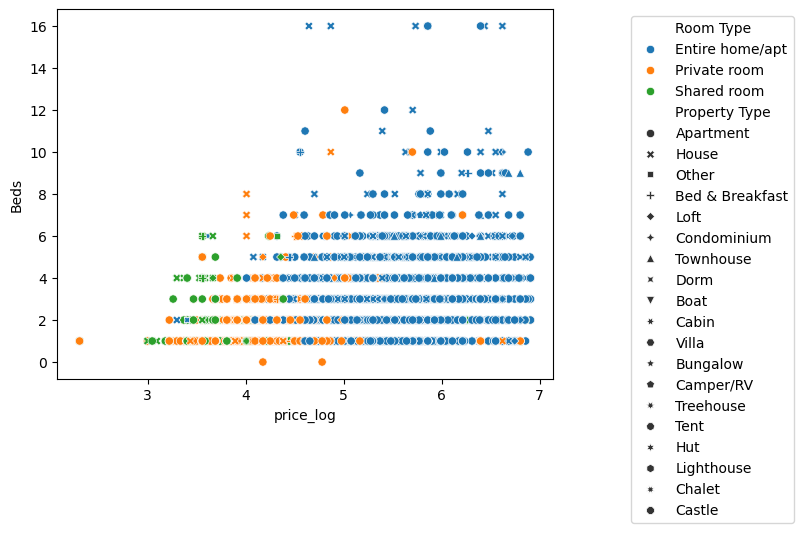

In [134]:
var1 = df['price_log']
var2= df['Beds']
cat1 = df['Room Type']
cat2 = df['Property Type']
this_plot = sns.scatterplot(data=df, x=var1, y=var2, hue=cat1, style = cat2)
sns.move_legend(this_plot, "upper right", bbox_to_anchor=(1.5, 1))

In [144]:
df.loc[:,['Room Type','Property Type','Price']].groupby(['Room Type','Property Type']).describe()

Price                                 \
                                   count        mean         std    min   
Room Type       Property Type                                             
Entire home/apt Apartment        15550.0  200.210161  109.967435   10.0   
                Bed & Breakfast     13.0  184.538462  119.814172   85.0   
                Boat                 7.0  158.428571   51.110524  100.0   
                Bungalow             4.0  150.750000   46.464144   87.0   
                Cabin                1.0  250.000000         NaN  250.0   
                Camper/RV            6.0  114.333333  107.685963   45.0   
                Condominium         71.0  281.126761  175.313998   80.0   
                Dorm                 4.0   44.250000   24.060687   30.0   
                House              723.0  234.554633  159.785974   27.0   
                Lighthouse           1.0   39.000000         NaN   39.0   
                Loft               379.0  284.910290  184.515517   55.0   
                Other               10.0  290.800000  273.526273   66.0   
                Townhouse           81.0  242.037037  166.755243   66.0   
                Villa                3.0  206.333333   89.667906  120.0   
Private room    Apartment        10741.0   91.605903   46.356168   10.0   
                Bed & Breakfast    155.0   97.161290   47.031971   32.0   
                Boat                 1.0  120.000000         NaN  120.0   
                Cabin                1.0   80.000000         NaN   80.0   
                Camper/RV            1.0   39.000000         NaN   39.0   
                Castle               1.0  150.000000         NaN  150.0   
                Chalet               1.0   99.000000         NaN   99.0   
                Condominium         22.0   98.590909   40.576394   46.0   
                Dorm                16.0   86.562500   40.738137   50.0   
                House             1258.0   77.750397   49.402650   25.0   
                Hut                  2.0   75.000000   35.355339   50.0   
                Loft               310.0   99.077419   63.875489   39.0   
                Other               28.0  176.642857  141.484252   39.0   
                Tent                 4.0  126.250000   94.989034   40.0   
                Townhouse           52.0   83.365385   30.578109   45.0   
                Treehouse            1.0   95.000000         NaN   95.0   
                Villa                4.0  126.250000   71.107313   60.0   
Shared room     Apartment          684.0   77.853801   57.875888   20.0   
                Bed & Breakfast     12.0  143.666667  245.328104   30.0   
                Dorm                11.0   73.181818   46.328864   30.0   
                House               79.0   46.822785   25.152743   10.0   
                Loft                49.0   78.816327   87.521824   30.0   
                Other                4.0  148.750000  134.806961   70.0   
                Townhouse            1.0   95.000000         NaN   95.0   
                Treehouse            3.0  167.666667  114.788211   95.0   

                                                               
                                    25%    50%     75%    max  
Room Type       Property Type                                  
Entire home/apt Apartment        135.00  175.0  230.00  999.0  
                Bed & Breakfast  121.00  130.0  220.00  525.0  
                Boat             122.50  150.0  182.00  250.0  
                Bungalow         133.50  160.5  177.75  195.0  
                Cabin            250.00  250.0  250.00  250.0  
                Camper/RV         49.00   74.0  114.00  325.0  
                Condominium      155.00  200.0  360.00  850.0  
                Dorm              30.00   33.5   47.75   80.0  
                House            125.00  188.0  299.00  950.0  
                Lighthouse        39.00   39.0   39.00   39.0  
                Loft             160.00  220.0  350.

Entire Homes appear to be the room type that is most expensive, while an entire loft appears to be the most expensive room type. Entire homes have the highest standard deviation, while bed and breakfasts have the highest standard deviation for property type (excluding 'other'). Due to such high standard deviations, median would appear to be a better estimate of central tendency

We've looked a bit at this price_log and Beds scatterplot. Use seaborn to make a jointplot with kind=hex. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

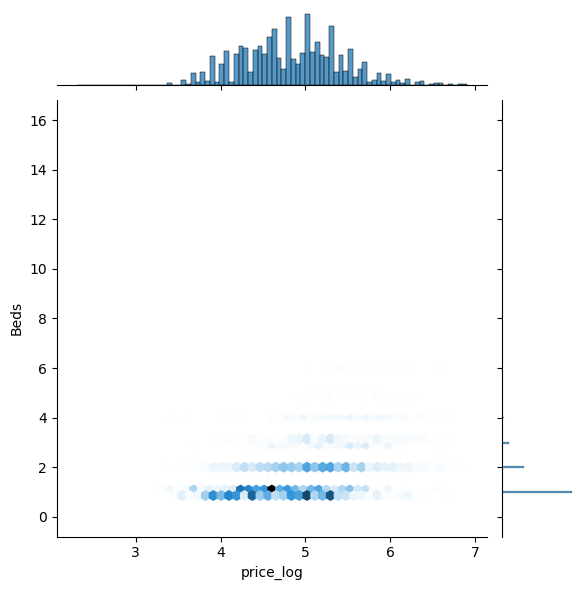

In [146]:
var1 = df['price_log']
var2 = df['Beds']
sns.jointplot(data=df, x=var1, y=var2, kind='hex')

The data appears to be primarily 1 to 2 beds. This makes me think that data about prices of airbnbs with more than 2 beds may be more inaccurate or skewed due to less available options.